<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/III.%20Matematica_Ciencia_Datos/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 7.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=76bce4ba1a6aac5e7021da932f5a17b7f2c4a75a3ae8ab30b0f00709d4a44a2e
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import lifelines
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/Employee_Attrition.csv")

In [ ]:
data.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


In [ ]:
data.shape

(1470, 35)

In [ ]:
data["Attrition"].replace({"Yes":1,"No":0},inplace=True)

In [ ]:
data=data[["DailyRate","DistanceFromHome","Education","MonthlyIncome","MonthlyRate","Age","Attrition"]]

#Análisis Exploratorio

In [ ]:
data.describe()

,DailyRate,DistanceFromHome,Education,MonthlyIncome,MonthlyRate,Age,Attrition
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,802.485714,9.192517,2.912925,6502.931293,14313.103401,36.923810,0.161224
std,403.509100,8.106864,1.024165,4707.956783,7117.786044,9.135373,0.367863
min,102.000000,1.000000,1.000000,1009.000000,2094.000000,18.000000,0.000000
25%,465.000000,2.000000,2.000000,2911.000000,8047.000000,30.000000,0.000000
50%,802.000000,7.000000,3.000000,4919.000000,14235.500000,36.000000,0.000000
75%,1157.000000,14.000000,4.000000,8379.000000,20461.500000,43.000000,0.000000
max,1499.000000,29.000000,5.000000,19999.000000,26999.000000,60.000000,1.000000


In [ ]:
pd.crosstab(data.Attrition,data.Gender,margins=True)

Gender,Female,Male,All
Attrition,,,
No,501,732,1233
Yes,87,150,237
All,588,882,1470


In [ ]:
100*pd.crosstab(data.Attrition,data.Gender,normalize='index').round(4)

Gender,Female,Male
Attrition,,
No,40.63,59.37
Yes,36.71,63.29


In [ ]:
pd.crosstab(data.Attrition,data.MaritalStatus,margins=True)

MaritalStatus,Divorced,Married,Single,All
Attrition,,,,
No,294,589,350,1233
Yes,33,84,120,237
All,327,673,470,1470


In [ ]:
100*pd.crosstab(data.Attrition,data.MaritalStatus,normalize='index').round(4)

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,23.84,47.77,28.39
Yes,13.92,35.44,50.63


## Kaplan-Meier estimator

Text(0.5, 1.0, 'Survival Curve')

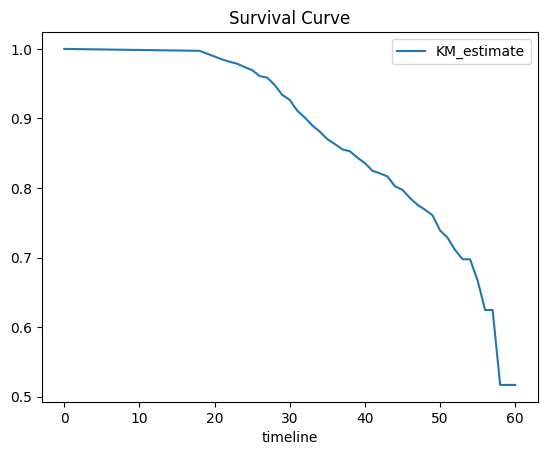

In [ ]:
kmf = lifelines.KaplanMeierFitter()

T = data.Age
E = data.Attrition
kmf.fit(T, E)
kmf.survival_function_.plot()
plt.title('Survival Curve')
#plt.ylim(0,1);

<Axes: xlabel='timeline'>

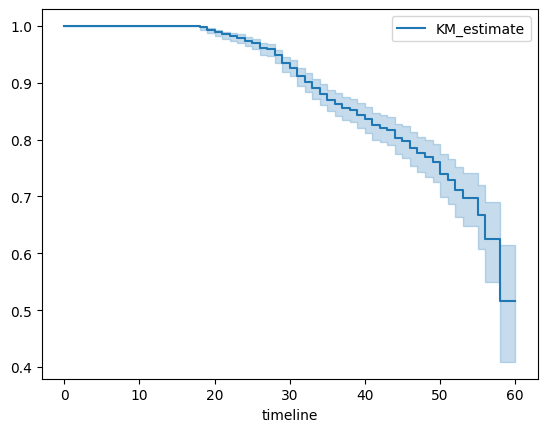

In [ ]:
kmf.plot()

De la gráfica se observa que aproximadamente a partir de los 40 años de edad hay una caída acelerada de las personas desgastadas por el puesto de trabajo que se encuentran ejerciendo.

In [ ]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,1470,1470
18.0,8,4,4,0,1470
19.0,9,6,3,0,1462
20.0,11,6,5,0,1453
21.0,13,6,7,0,1442
22.0,16,5,11,0,1429
23.0,14,4,10,0,1413
24.0,26,7,19,0,1399
25.0,26,6,20,0,1373


## Cox Proportional Hazards Regression

In [ ]:
from lifelines import CoxPHFitter

In [ ]:
cph = CoxPHFitter()
cph.fit(data, duration_col='Age', event_col='Attrition')

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>

In [ ]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'Age'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1489.45
         time fit was run = 2023-12-17 15:36:37 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
DailyRate         -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
DistanceFromHome   0.02       1.02       0.01             0.01             0.04                 1.01                 1.04
Education         -0.18       0.84       0.07            -0.31            -0.05                 0.74                 0.95
MonthlyIncome     -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
MonthlyRate        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

                   cmp to     z      p   -log2(p)
covariate                                        
DailyRate            0.00 -2.16   0.03       5.02
DistanceFromHome     0.00  3.01 <0.005       8.60
Education            0.00 -2.75   0.01       7.38
MonthlyIncome        0.00 -8.70 <0.005      58.13
MonthlyRate          0.00  0.34   0.74       0.44
---
Concordance = 0.76
Partial AIC = 2988.91
log-likelihood ratio test = 138.75 on 5 df
-log2(p) of ll-ratio test = 91.29

<Axes: xlabel='log(HR) (95% CI)'>

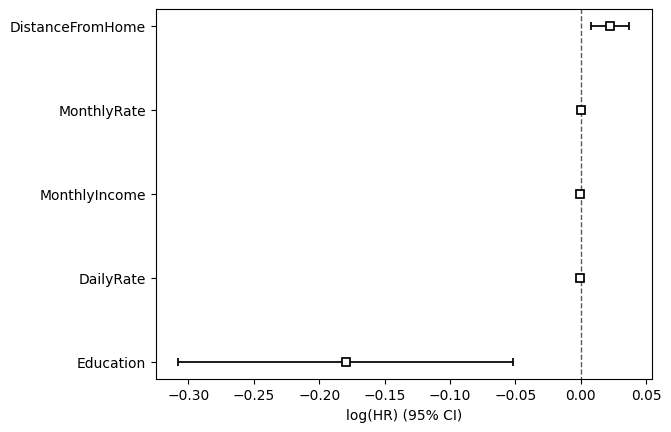

In [ ]:
cph.plot()